In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

### 단축키 사용법
- crtl + M + m: 마크다운 셀로 변환
- crtl + M + y: 에딧 셀로 전환
- a,b 위 아래로 추가
- crtl + M + D: 셀 삭제
- crtl + M + Z: 삭제 된 셀 복구 (유용유용)

In [19]:
# from google.colab import drive
# drive.mount("/content/drive")

In [20]:
# # 작업 위치 조회
# !pwd

In [21]:
# 작업 위치 변경
%cd /content/drive/MyDrive/딥러닝

/content/drive/MyDrive/딥러닝


### 목표
- TensorFlow
- 머신러닝 딥러닝 차이


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("./data/student-mat.csv", delimiter=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [24]:
data.info()

# 결측치는 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [25]:
# 문제 데이터와 정답데이터 분리
# 문제 데이터는 2차원이여야함!
from sklearn.preprocessing import MinMaxScaler
X = data[['studytime', 'traveltime', 'freetime', 'health']]  # 문제
y = data["G3"]           # 정답
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X.shape, y.shape

((395, 4), (395,))

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# shape 쓰기
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((316, 4), (79, 4), (316,), (79,))

### 머신러닝 모델링

In [28]:
# 모델 생성
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 학습
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

# 평가
linear_model.score(x_test,y_test)

# 테스트 데이터에 대한 예측값 생성
y_pred = linear_model.predict(x_test)

# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # 혹은 mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE (평균 절대 오차): {mae}")
print(f"MSE (평균 제곱 오차): {mse}")
print(f"RMSE (평균 제곱근 오차): {rmse}")

MAE (평균 절대 오차): 3.674357228184393
MSE (평균 제곱 오차): 20.928379755090102
RMSE (평균 제곱근 오차): 4.574754611461701


### 머신러닝과 딥러닝 비교
> 머신러닝(Sklearn)
> - 클래스 임포트 -> 모델 생성(초기화) -> 학습 -> 예측 & 평가
> - 다양한 알고리즘들이 여러 클래스로 구현되어있음(완제품 로봇에 도색)

#### 딥러닝(Tesorflow 기반)
> - 모델 설계 -> 학습 -> 예측 & 평가
> - 각각의 층을 직접 정의(이미 만들어진 층을 가져오기 가능)하고, 이름 조합 (레고로 만드는 조립식 로봇)
> - 직접 설계할 수 있으니, 유연성이 높음

### 딥러닝 모델링
1. 신경망 구조 설계
2. 학습 방법 설정
3. 학습
4. 예측 & 평가

In [29]:
# 1. 신경망 구조 설계

# 뼈대
model = Sequential()

# 입력층 - 입력모양을 정하는 역할
model.add(InputLayer(shape = (4,)))  # 데이터 4개의 모양 지정

# 중간층
# units
# activation
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# 출력층
model.add(Dense(units=1))

In [30]:
# 2. 학습 방법 설정
# 출력층에 따라 달라짐!!
# 1. 오차 구하는 도구 => 손실함수 설정
# 2. 최적화 함수 설정
# 3. 평가 방식
model.compile( loss = "mean_squared_error", optimizer = "Adam", metrics = ["mse"] )

In [31]:
# model 학습
h = model.fit(x_train, y_train, epochs=40, validation_split= 0.2, verbose=0)

In [32]:
# 4. 평가
model.evaluate(x_test, y_test)  # sklearn의 score의 그것과 같다

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 28.9685 - mse: 28.9685 


[25.976469039916992, 25.976469039916992]

In [33]:
h.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

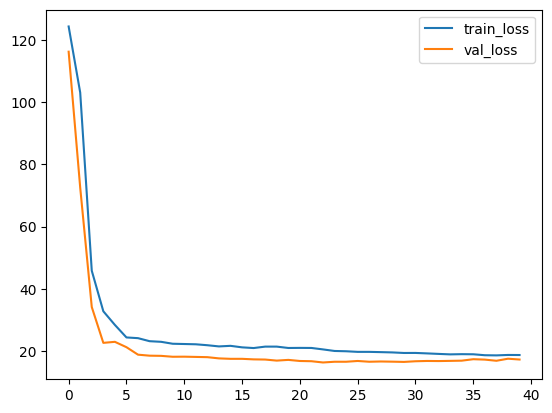

In [34]:
# 학습 결과 시각화
plt.plot(h.history['loss'], label = "train_loss")
plt.plot(h.history['val_loss'], label = "val_loss")

plt.legend()  # 범례 표시

plt.show()